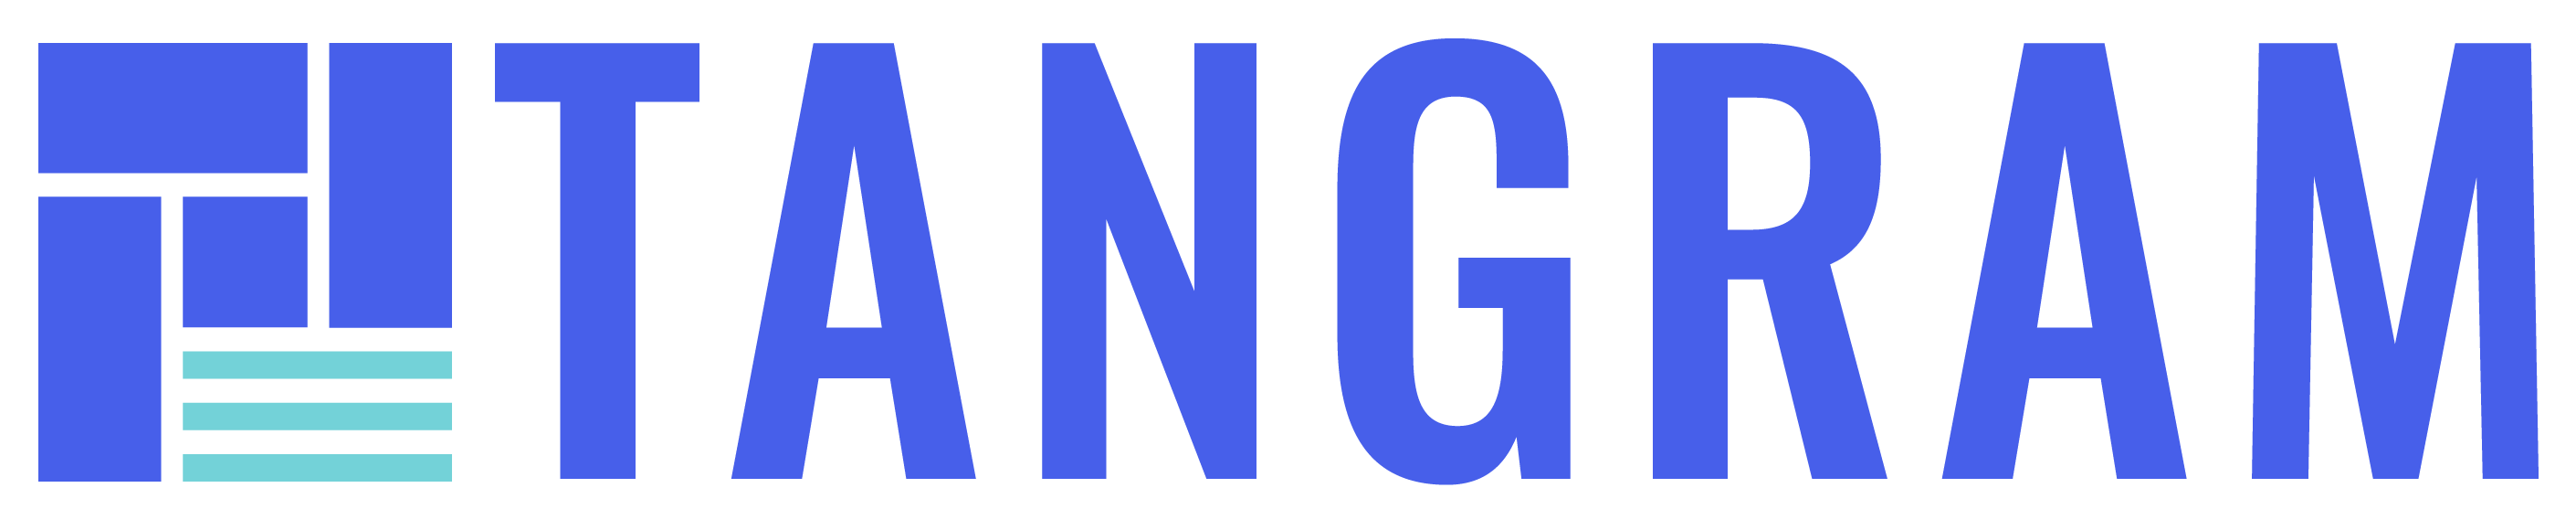

# Task 3: Mapping of Chromatin Accessibility in the Mouse Brain

Inspired by work from Louis Reich and [Biancalani et. al](https://doi.org/10.1038/s41592-021-01264-7).

## Introduction and Background

**ATAC-seq**  
ATAC-seq (Assay for Transposase-Accessible Chromatin using sequencing) is a powerful technique for profiling genome-wide chromatin accessibility.
By using a hyperactive transposase to insert sequencing adapters into open regions of the genome, ATAC-seq identifies active regulatory elements, such as enhancers and promoters, as well as potential transcription factor binding sites. This method enables researchers to study epigenetic regulation, compare accessibility across different cell types or conditions, and infer gene regulatory networks. Its relatively low input requirement and high resolution make it widely used in single-cell and bulk epigenomic studies.

**Spatial Chromatin Accessibility**  
SHARE-seq (Simultaneous High-throughput ATAC and RNA Expression sequencing) is a multi-omic single-cell method that measures both RNA-seq and chromatin accessibility (ATAC-seq) from the same cell. This paired setup allows us to directly connect transcriptional states with the regulatory landscape that underlies them. 
This provides insights into gene regulatory dynamics and epigenetic control during processes like differentiation or disease progression. 
Here, we have saved the SHARE-seq data in two AnnData objects: one contains the RNA counts, and the other contains the ATAC data.  
The ATAC-seq modality represents chromatin accessibility as a set of genomic “peaks,” regions where the DNA is open and transcription factors are more likely to bind. Conceptually, it looks like a sparse peak-by-cell matrix, where each cell has accessibility values for genomic regions.

In this notebook, we run the Tangram mapping algorithm, aligning SHARE-seq data to the spatial MERFISH data. By doing this, we transfer cell locations from the transcriptome to the ATAC modality. This allows us to generate spatial chromatin accessibility profiles and explore how regulatory landscapes vary across tissue space.


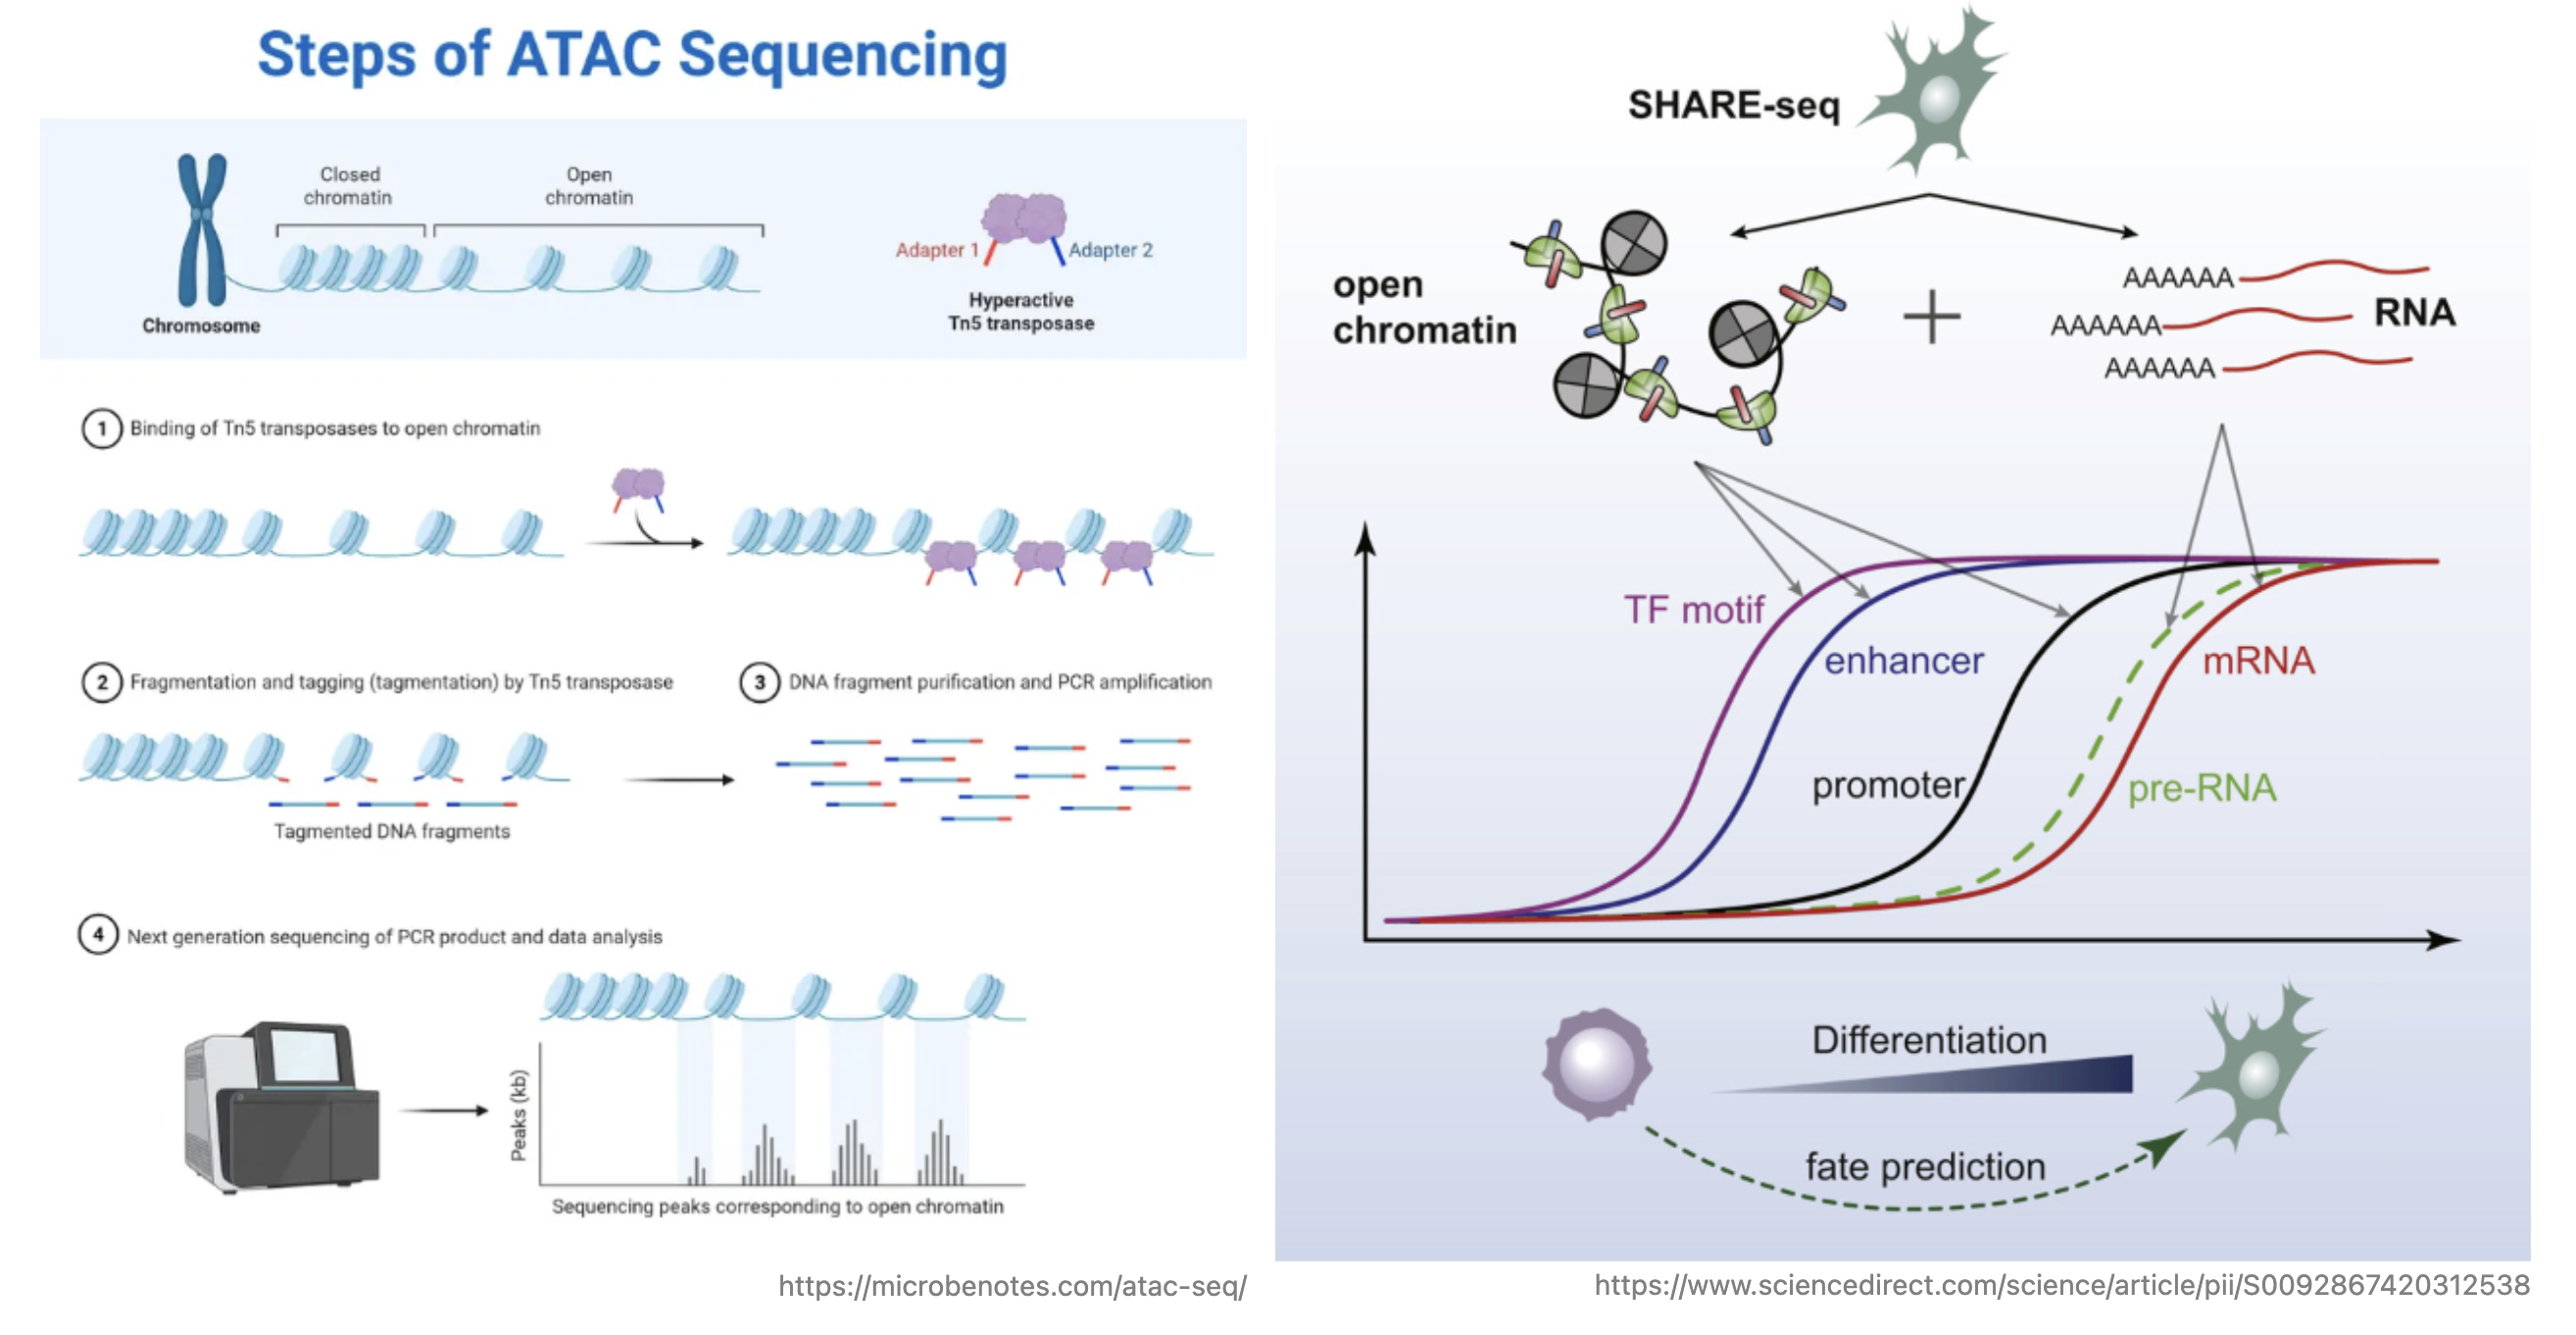




   

## Setup, data loading and preprocessing

In [ ]:
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import tangram as tg
import anndata as ad

import os
import sys
from pathlib import Path

%load_ext autoreload
%autoreload 2
%matplotlib inline

datadir = '../../datasets/Hands_on_4_Tangram/Task_3/'

For this exercise, we will analyze the following two datasets: 

- SHARE-seq: sample GSM4156599 for scATAC-seq, GSM4156610
for scRNA-seq of Sai Ma et al. “Chromatin Potential Identified by Shared Single-Cell Profiling of RNA and
Chromatin”. In: Cell 183.4 (Nov. 12, 2020). Publisher: Elsevier, 1103–1116.e20. issn:
0092-8674, 1097-4172. doi: 10.1016/j.cell.2020.09.056.) (sample GSM4156599 for scATAC-seq, GSM4156610
for scRNA-seq). 

- Spatial RNA-seq: mouse 1, slice 201 of Meng Zhang et al. “Molecularly defined and spatially resolved cell atlas of the whole
mouse brain”. In: Nature 624.7991 (2023), pp. 343–354. issn: 0028-0836. doi: 10.
1038/s41586-023-06808-9.

In [ ]:
ad_sp = sc.read_h5ad(os.path.join(datadir, "c_sp_ad.h5ad"))
ad_sp

In [ ]:
ad_rna = sc.read_h5ad(os.path.join(datadir, "c_sc_ad.h5ad"))
ad_rna

In [ ]:
ad_atac_genes = sc.read_h5ad(os.path.join(datadir, "c_atac_genes_ad.h5ad"))
ad_atac_genes

## PCA and UMAP plotting

First, let's get familiar with the datasets by visualizing them as UMAPS.

In [ ]:
sc.pl.umap(
    ad_rna,
    color="celltype",
)

In [ ]:
sc.pl.umap(
    ad_sp,
    color="subclass",
)

In [ ]:
sc.pl.umap(
    ad_atac_genes,
    color="celltype",
)

First, we align the single-cell and spatial gene expression, just like in previous exercises.

**Task**: You already know the first step before running Tangram! 

In [ ]:
# XXX

## Running Tangram

**Task**: Now map the scRNA-seq cells to space. 

In [ ]:
# XXX

<div style="
    background-color: #e6f3ff;
    border-left: 4px solid #2196F3;
    padding: 10px 15px;
    border-radius: 5px;
    margin: 10px 0;
">
<b>💡 Hint:</b> This time, the datasets are small so the mapping takes <5 min on our server. If you still don't want to wait, you can instead load <code>ad_map_task3.h5ad.</code> from the <code>datadir</code>. For training, try to write the code anyways. 
</div>


## Projecting celltype annotations to space

**Task**: Transfer the celltype annotation from the single-cell dataset to space. Hint: `tg.project_cell_annotation`. 

In [ ]:
# XXX

We now have a probability for each spot, that tells us how likely is belongs to a certain cell type.  

In [ ]:
ad_sp.obsm["tangram_ct_pred"]

**Task**: Now, plot the spatial probability maps for all celltypes. Interpret, whether the celltypes are mapped as expected.  

In [ ]:
annotation_list = list(pd.unique(ad_rna.obs['celltype']))
tg.plot_cell_annotation_sc(ad_sp, annotation_list, spot_size=40, perc=0.02)

Now we are using the cell type label with the largest probability as the prediction for each cell.

In [ ]:
ad_sp.obs["transferred_celltype"] = ad_sp.obsm["tangram_ct_pred"].idxmax(axis=1)

In [ ]:
sq.pl.spatial_scatter(
    ad_sp, shape=None, color=["subclass", "transferred_celltype"], size=5, 
    axis_label=["",""], title=""
)

This shows that the cellypes were mapped to the expected layers: EN04 in layer 4, EN01 in layer 1, EN07 in layers 5/6, EN05 in layers 5/6, EN02 in layer 6

# Using Tangram's mapping to extend gene throughput of spatial data

**Task**: Impute the spatial expression of all genes from the scRNA-seq dataset. Plot the result.

In [ ]:
# ad_sp_transcriptome = ...
# ... 

<div style="
    background-color: #e6f3ff;
    border-left: 4px solid #2196F3;
    padding: 10px 15px;
    border-radius: 5px;
    margin: 10px 0;
">
<b>💡 Note:</b> This plotting method adds <i>spatial</i> to <code>ad_sp_transcriptome.obsm</code>.
</div>


# Transfering Tangram mapping to scATAC data to project peaks to space

Now we finally get to the chromatin accessibility data. First, we have to transfer the obs index.

In [ ]:
ad_atac_genes.obs_names = ad_map.obs_names

**Task**: Utilize Tangram's mapping to transfer scATAC peaks to space. Plot the results.

In [ ]:
# gene_accessibility_spatial = ...
# ... 

## Spatial autocorrelation analysis on ATAC data

**Bonus task**: Build a spatial neighborhood graph, calculate Geary's C spatial autocorrelation and plot the spatial distribution of the top genes. Plot the accessibility of the 20 genes with the highest Geary's C score. What does this mean? 

<div style="
    background-color: #e6f3ff;
    border-left: 4px solid #2196F3;
    padding: 10px 15px;
    border-radius: 5px;
    margin: 10px 0;
">
<b>💡 Hint:</b> <i>Squidpy</i> offers the methods <code>spatial_neighbors</code> and <code>spatial_autocorr</code>.
</div>


In [ ]:
# ... 

## Spatial autocorrelation analysis on RNA data

**Bonus task**: Build a spatial neighborhood graph, calculate Geary's C spatial autocorrelation and plot the spatial distribution of the top genes.

In [ ]:
# ...

Note: `ad_sp_transcriptome` and `gene_accessibility_spatial` are also stored in the datadir. You can load it if computations take too long.